In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [8]:
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [9]:
x_train = x_train/ 255
x_test = x_test/ 255

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

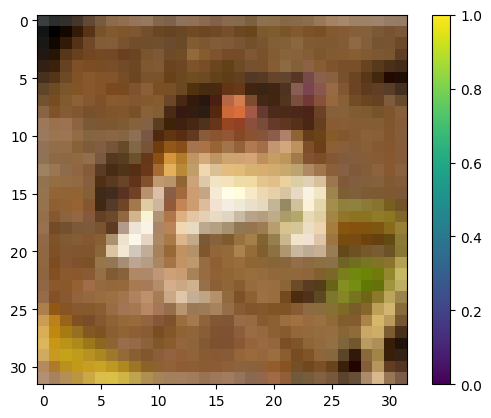

Номер класса: [6]
Тип объекта: лягушка


In [11]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()
print("Номер класса:", y_train[0])
print("Тип объекта:", class_names[y_train[0][0]])


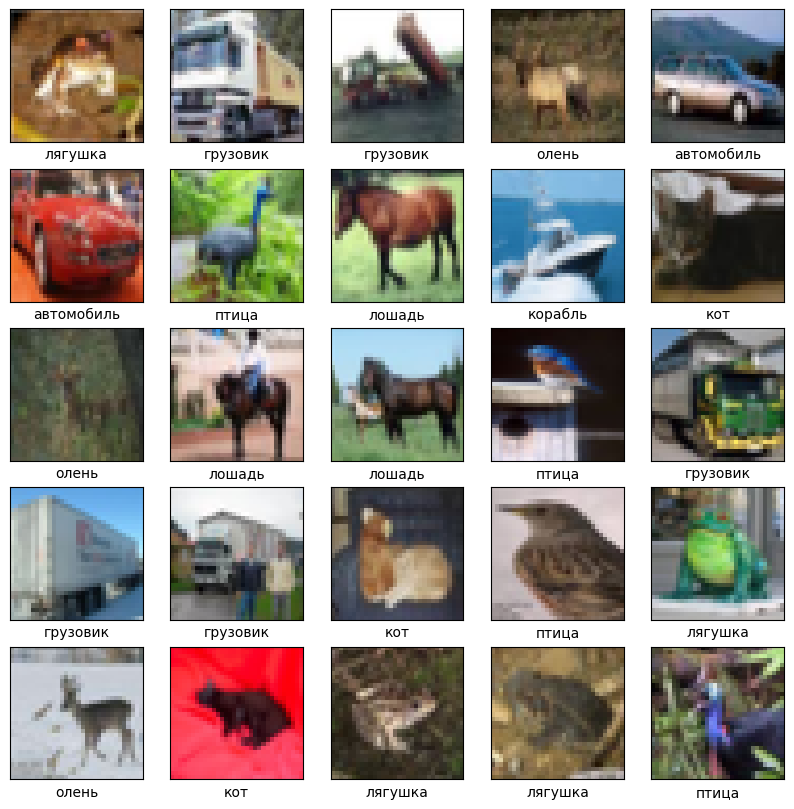

In [12]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002),
              loss='MeanSquaredLogarithmicError',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)        

In [16]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 370s 294ms/step - loss: 0.0332 - accuracy: 0.4435 - val_loss: 0.0263 - val_accuracy: 0.5923
Epoch 2/3
1250/1250 [==============================] - 367s 294ms/step - loss: 0.0238 - accuracy: 0.6344 - val_loss: 0.0226 - val_accuracy: 0.6556
Epoch 3/3
1250/1250 [==============================] - 387s 309ms/step - loss: 0.0197 - accuracy: 0.7059 - val_loss: 0.0196 - val_accuracy: 0.7083


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 24s 77ms/step - loss: 0.0198 - accuracy: 0.7061
Test loss: 0.019753409549593925
Test accuracy: 0.7060999870300293


In [18]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 107s 68ms/step


In [21]:
np.argmax(predictions[40])

5

In [22]:
y_train[40]

array([5], dtype=uint8)

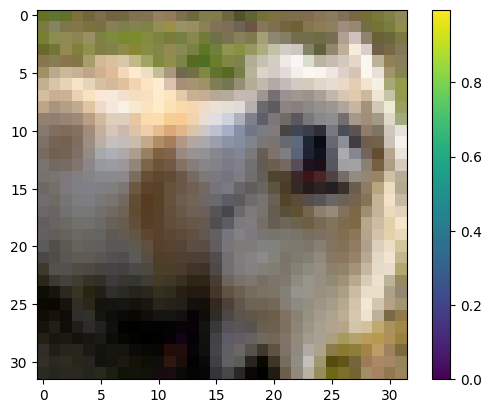

In [26]:
plt.figure()
plt.imshow(x_train[40])
plt.colorbar()
plt.grid(False)